**Course**: Deep Learning

[<img align="right" width="400" height="100" src="https://www.tu-braunschweig.de/typo3conf/ext/tu_braunschweig/Resources/Public/Images/Logos/tu_braunschweig_logo.svg">](https://www.tu-braunschweig.de/en/) 

[Mehdi Maboudi](https://www.tu-braunschweig.de/en/igp/staff/mehdi-maboudi) \([m.maboudi@tu-bs.de](m.maboudi@tu-bs.de)) and [Pedro Achanccaray](https://www.tu-braunschweig.de/en/igp/staff/pedro-diaz) (p.diaz@tu-bs.de)

[Technical University of Braunschweig](https://www.tu-braunschweig.de/en/)  
[Institute of Geodesy and Photogrammetry](https://www.tu-braunschweig.de/igp)

# MLP for simple regression problem
We should use regression for object localization.
In this mini-assignment you create a simple MLP to predict a value for each sample, given that we have a training set to train a regression model

## Simulate a dataset

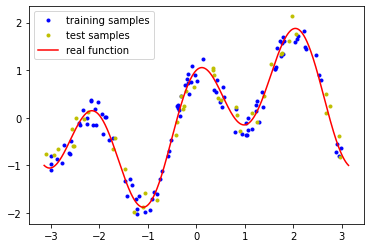

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

seed = 42
rng = np.random.default_rng(seed)
N = 150
noise_level = 0.3
def f(X): return np.sin(X) + np.cos(3*X)


a = -1*np.pi  # domain min
b = np.pi  # domain max
x = (b - a) * rng.random(N) + a  # input
y = f(x) + rng.uniform(-noise_level, noise_level, (N,))  # output
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=seed)

fig, ax = plt.subplots()
ax.plot(X_train, y_train, 'b.',label = "training samples")
ax.plot(X_test, y_test, 'y.',label = "test samples")

xr = np.arange(a, b, .001)
ax.plot(xr, f(xr), 'r', label = "real function")
ax.legend()

In [2]:
#REshape the data
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)


In [3]:
X_train.shape

(105, 1)

In [4]:
#Reshape xr to match X_train
xr = xr.reshape(-1, 1)

## Construct the regression model

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense


def regression_model(seed=42):
  tf.random.set_seed(seed)
  # Constructing a Multilayer Perceptron
  model = Sequential()
  #TODO:
  ###################################
  #Add some dense layer
  # Output layer should have just one neuron
  # Select the proper activation function
  model.add(Dense(105, input_shape=X_train.shape, kernel_initializer='normal', activation='relu'))
  model.add(Dense(1, kernel_initializer='normal', activation = 'linear'))
  ###################################
  return model



## Training

In [6]:
import time
BATCH_SIZE = 10
LEARNING_RATE = 0.007

model = regression_model()
print(model.summary())
opt = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
#print(model.layers[-1].weights[0].numpy().sum())#Check repeatability
model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError()])



tm = time.time()
hist = model.fit(X_train, y_train,
                 batch_size=BATCH_SIZE,
                 validation_data= (X_test,y_test),
                 epochs=300, verbose=1)
tm_train = time.time() - tm


tm = time.time()
results = model.predict(xr)  # predicting values over the function domain
tm_predict = time.time() - tm

#print("RMS: ", tf.keras.metrics.MeanSquaredError(xte, yte))  # calculating RMSE on test samples
# print(model.evaluate(xtr, ytr)) # print loss and accuracy
print("Training Time: %.4f s" % tm_train)
print("Prediction Time: %.4f s" % (tm_predict))

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 105, 105)          210       
                                                                 
 dense_1 (Dense)             (None, 105, 1)            106       
                                                                 
Total params: 316
Trainable params: 316
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/300


2022-07-25 00:26:07.313545: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-25 00:26:07.314070: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-07-25 00:26:07.426124: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


 1/11 [=>............................] - ETA: 3s - loss: 0.7976 - root_mean_squared_error: 0.8931

2022-07-25 00:26:07.642142: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 1s 24ms/step - loss: 0.7715 - root_mean_squared_error: 0.8783 - val_loss: 0.5822 - val_root_mean_squared_error: 0.7630
Epoch 2/300
11/11 [==============================] - 0s 10ms/step - loss: 0.6528 - root_mean_squared_error: 0.8080 - val_loss: 0.5809 - val_root_mean_squared_error: 0.7621
Epoch 3/300
 1/11 [=>............................] - ETA: 0s - loss: 0.7817 - root_mean_squared_error: 0.8841

2022-07-25 00:26:07.970700: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 0s 10ms/step - loss: 0.6441 - root_mean_squared_error: 0.8025 - val_loss: 0.5625 - val_root_mean_squared_error: 0.7500
Epoch 4/300
11/11 [==============================] - 0s 10ms/step - loss: 0.6393 - root_mean_squared_error: 0.7995 - val_loss: 0.5748 - val_root_mean_squared_error: 0.7581
Epoch 5/300
11/11 [==============================] - 0s 10ms/step - loss: 0.6205 - root_mean_squared_error: 0.7877 - val_loss: 0.5526 - val_root_mean_squared_error: 0.7434
Epoch 6/300
11/11 [==============================] - 0s 10ms/step - loss: 0.6202 - root_mean_squared_error: 0.7875 - val_loss: 0.5377 - val_root_mean_squared_error: 0.7333
Epoch 7/300
11/11 [==============================] - 0s 12ms/step - loss: 0.6276 - root_mean_squared_error: 0.7922 - val_loss: 0.5440 - val_root_mean_squared_error: 0.7376
Epoch 8/300
11/11 [==============================] - 0s 10ms/step - loss: 0.6026 - root_mean_squared_error: 0.7763 - val_loss: 0.5291 - val_root_mean_sq

2022-07-25 00:26:40.502948: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


197/197 [==============================] - 1s 3ms/step
Training Time: 33.0521 s
Prediction Time: 0.7985 s


## Prediction on test set

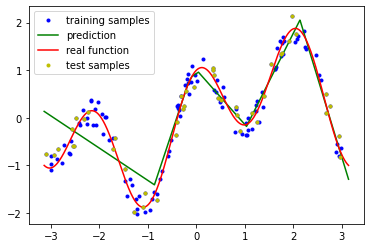

In [7]:
#Reshape the results to match the original data
results = results.reshape(-1)

fig, ax = plt.subplots()
ax.plot(x, y, 'b.',label = "training samples")
ax.plot(xr, results,'g', label = "prediction")
ax.plot(xr, f(xr), 'r', label = "real function")
ax.plot(X_test, y_test, 'y.',label = "test samples")

ax.legend()
plt.show()